In [1]:
import sys
# sys.path.append('/Users/tport/Desktop/USC/Semesters/Projects/LSP/sllsp')
sys.path.append('/Users/tport/miniconda3/envs/RL-LSP/lib/python3.13/site-packages')

## Gymnasium code
Gymnasium code for reference, which is much easier to read and has better documentation.

In [2]:
"""
Copied from https://gymnasium.farama.org/introduction/record_agent/
"""

import logging

import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

logging.basicConfig(level=logging.INFO)

training_period = 250  # record the agent's episode every 250
num_training_episodes = 10_000  # total number of training episodes

env = gym.make("CartPole-v1", render_mode="rgb_array")  # replace with your environment
# env = RecordVideo(env, video_folder="cartpole-agent", name_prefix="training",
#                   episode_trigger=lambda x: x % training_period == 0)
env = RecordEpisodeStatistics(env)

for episode_num in range(num_training_episodes):
    obs, info = env.reset()

    episode_over = False
    while not episode_over:
        action = env.action_space.sample()  # replace with actual agent
        obs, reward, terminated, truncated, info = env.step(action)

        episode_over = terminated or truncated

    print(f"episode-{episode_num}", info["episode"])
env.close()

episode-0 {'r': 32.0, 'l': 32, 't': 0.000314}
episode-1 {'r': 26.0, 'l': 26, 't': 0.000269}
episode-2 {'r': 19.0, 'l': 19, 't': 0.000137}
episode-3 {'r': 46.0, 'l': 46, 't': 0.000324}
episode-4 {'r': 26.0, 'l': 26, 't': 0.000182}
episode-5 {'r': 22.0, 'l': 22, 't': 0.000154}
episode-6 {'r': 33.0, 'l': 33, 't': 0.000231}
episode-7 {'r': 11.0, 'l': 11, 't': 7.8e-05}
episode-8 {'r': 20.0, 'l': 20, 't': 0.00014}
episode-9 {'r': 13.0, 'l': 13, 't': 9.3e-05}
episode-10 {'r': 19.0, 'l': 19, 't': 0.000134}
episode-11 {'r': 29.0, 'l': 29, 't': 0.000203}
episode-12 {'r': 40.0, 'l': 40, 't': 0.000335}
episode-13 {'r': 10.0, 'l': 10, 't': 0.000101}
episode-14 {'r': 15.0, 'l': 15, 't': 0.000106}
episode-15 {'r': 16.0, 'l': 16, 't': 0.000113}
episode-16 {'r': 27.0, 'l': 27, 't': 0.000195}
episode-17 {'r': 41.0, 'l': 41, 't': 0.000284}
episode-18 {'r': 12.0, 'l': 12, 't': 8.5e-05}
episode-19 {'r': 13.0, 'l': 13, 't': 9.1e-05}
episode-20 {'r': 26.0, 'l': 26, 't': 0.000181}
episode-21 {'r': 17.0, 'l': 

## Playing with the environment
Use the basic APIs `step_env`, `action_space`, `sample` to interact with a dumb agent, which uniformly at random picks gates from the available set.

In [11]:
from gymnax.environments import environment
from simulators.clifford_gates import CliffordGates
from envs.logical_state_preparation_env import LogicalStatePreparationEnv
import jax
import time

class DumbAgent:
    def __init__(self, env : environment.Environment) -> None:
        self.env = env;
        pass

    def action(self, rng_key, state):
        return self.env.action_space().sample(rng_key);

key = jax.random.key(int(time.time()))
key, key_reset, key_act, key_step = jax.random.split(key, 4)

n = 2;
target = ["+ZI", "+IZ"];
# target = ["+ZZZZZZZ", "+ZIZIZIZ", "+XIXIXIX", "+IZZIIZZ", "+IXXIIXX", "+IIIZZZZ", "+IIIXXXX"];
clifford_gates = CliffordGates(n);

lsp = LogicalStatePreparationEnv(
    target,
    gates=[clifford_gates.s, clifford_gates.sqrt_x],
    graph=None,
    distance_metric = 'jaccard',
    max_steps = 5,
    threshold = 0.99,                     
)
env_params = None;

agent = DumbAgent(lsp);

observation, env_state = lsp.reset_env(key_reset, env_params);
done = False;
counter = 0;
total_reward = 0;
# action_list = [2, 1, 2, 2, 2];
while not done:
    key_act, _rng = jax.random.split(key_act);
    action = agent.action(key_act, observation);
    # action = action_list[counter];
    key_step, _rng = jax.random.split(key_step);
    next_observation, env_state, reward, done, info = lsp.step_env(key_step, env_state, action, env_params)
    # next_observation, reward, terminated, truncated, info = lsp.step_env();
    observation = next_observation;
    counter += 1;
    total_reward += reward;
    print(f"Gate: ({action}) {lsp.action_string_stim_circ[action]}\nReward: {reward}, Add. info: {info}\nDone?: {done}")
    print()
print(counter, total_reward)

/Users/tport/miniconda3/envs/RL-LSP/lib/python3.13/site-packages/jax/_src/ops/scatter.py:108: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=int32 to dtype=uint8 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


EnvState(tableau=Array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8), sign=Array([0, 0, 0, 0], dtype=uint8), previous_distance=Array(1., dtype=float32), time=0, max_diff=0.0)


/Users/tport/miniconda3/envs/RL-LSP/lib/python3.13/site-packages/jax/_src/numpy/array_methods.py:122: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


EnvState(tableau=Array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8), sign=Array([0, 0, 1, 0], dtype=uint8), previous_distance=Array(0.5, dtype=float32), time=1, max_diff=Array(0.5, dtype=float32))
Gate: (2) .append("sqrt_x", [0])
Reward: 0.0, Add. info: {'discount': Array(1., dtype=float32, weak_type=True), 'max_reward': Array(0., dtype=float32)}
Done?: False

EnvState(tableau=Array([[1, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]], dtype=uint8), sign=Array([0, 0, 0, 0], dtype=uint8), previous_distance=Array(0.33333334, dtype=float32), time=2, max_diff=Array(0.6666666, dtype=float32))
Gate: (0) .append("s", [0])
Reward: 0.0, Add. info: {'discount': Array(1., dtype=float32, weak_type=True), 'max_reward': Array(0., dtype=float32)}
Done?: False

EnvState(tableau=Array([[1, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 1]], dtype=uint8), sign=Array([0, 0, 0, 1], dtype=uint8), previous_distance

# Serious code
## Imports

In [1]:
import torch.nn as nn
from torch import Tensor
import torch.nn.functional as F
import torch

import time
import numpy as np
import jax

from gymnax.environments import environment
from simulators.clifford_gates import CliffordGates
from envs.logical_state_preparation_env import LogicalStatePreparationEnv


In [2]:
import time
import functools

def timeit(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        print(f"{func.__name__} took {end_time - start_time:.4f} seconds")
        return result
    return wrapper


## Class definitions

In [3]:
class Layout:
    graph : torch.Tensor
    adjacency_list : list[tuple[int, int]]
    adjacency_oh_matrices : tuple[Tensor, Tensor]

    def __init__(self, graph : Tensor) -> None:
        self.graph = graph.int()
        self.adjacency_list = Layout.construct_adjacency_list(self.graph)
        self.adjacency_oh_matrices = Layout.construct_adjacency_oh_matrices(self.graph)

    @staticmethod
    def construct_adjacency_list(graph: torch.Tensor) -> list[tuple[int, int]]:
        adj_list = []
        for q_idx, row in enumerate(graph):
            for t_idx, el in enumerate(row):
                # Assumes `graph` is an int tensor
                if q_idx > t_idx and (el == 1 or el == 1.):
                    adj_list.append((q_idx, t_idx))
                    adj_list.append((t_idx, q_idx))
        return adj_list

    @staticmethod
    def construct_adjacency_oh_matrices(graph: torch.Tensor) -> tuple[Tensor, Tensor]:
        """Construct matrices which one-hot encodings of the adjacency list representation.
        If (i, j) is a directed edge, then the first matrix will have one_hot(i) vector and the
        second will have one_hot(j) vector. The size of the matrices will be #edges * #nodes.
        """
        ctrl_list, tgt_list = [], []
        for q_idx, row in enumerate(graph):
            for t_idx, el in enumerate(row):
                if q_idx > t_idx and (el == 1 or el == 1.):
                    ctrl_list.append(q_idx)
                    tgt_list.append(t_idx)

                    ctrl_list.append(t_idx)
                    tgt_list.append(q_idx)
        nq = graph.shape[-1]
        return F.one_hot(torch.tensor(ctrl_list), num_classes=nq), F.one_hot(torch.tensor(tgt_list), num_classes=nq)

def sample_layout(n : int, gen : torch.Generator | None = None) -> Layout:
    """Construct a random graph with n vertices.

    Args:
        n: number of vertices
        rng: Random number generator
    
    Returns:
        Graph laplacian
    """
    satisfactory = False
    while not satisfactory:
        graph = torch.empty(n, n).uniform_(0, 1, generator=gen)
        graph = torch.bernoulli(graph, generator=gen)
        graph = torch.triu(graph, diagonal=1)
        graph = graph + torch.transpose(graph, 0, 1)
        graph = graph - torch.diag(graph.sum(dim=0))
        graph = graph.int()
        satisfactory = torch.all(graph.diag(0) != 0)
    return Layout(graph)

In [4]:
sample_layout(100)

In [5]:
from enum import Enum

class GT_1Q(Enum):
    """Gate Type - 1 Qubit
    """
    H = 1
    S = 2
    X = 3
    SQRT_X = 4

class GT_2Q(Enum):
    """Gate Type - 2 Qubit
    Model parameters, sampling procedure etc. will depend on the number of gates defined in
    this Enum. Any new gates added to the Enum can break the working functionality of a given
    model and set up.
    """
    CX = 1
    CZ = 2
    # SWAP = 3 # Unsupported
    # I_SWAP = 4 # Unsupported

## Torch modules

In [6]:
def _cartesian_add(x: Tensor, y: Tensor) -> Tensor:
    """ Consider x, y to be 2D tensors of dim (nx, dx) and (ny, dy) where dx = dy.
    Then, the result will be a 2D tensor of dim (nx*ny, dx) with the following elements:
    [x[0] + y[0], x[0] + y[1], ..., x[0] + y[ny-1], x[1] + y[0], ..., x[nx-1] + y[ny-1]]
    """
    nx, dx = x.shape[-2:]
    ny, dy = y.shape[-2:]
    assert dx == dy, f"Dimensions of x and y should match. Got {dx} and {dy}"

    x = x.unsqueeze(-2) # Shape: (nx, 1, d)
    x = x.expand(*x.shape[:-3], nx, ny, dx) # Shape: (nx, ny, d)
    x = x.reshape(*x.shape[:-3], -1, dx)

    y = y.unsqueeze(-3) # Shape: (1, ny, d)
    y = y.expand(*y.shape[:-3], nx, ny, dx) # Shape: (nx, ny, d)
    y = y.reshape(*y.shape[:-3], -1, dx)
    return x+y

def _generate_qubit_pair(qubits: Tensor, layout: Layout) -> Tensor:
    """ Given a layout of qubits with specified connectivity, and the qubit embeddings [q[0], ..., q[n-1]]
    return a tensor of concat(q[i], q[j]) where (i, j) forms an edge in the graph layout.
    """
    ctrl, tgt = layout.adjacency_oh_matrices
    return torch.concat((
        torch.matmul(ctrl.float(), qubits),
        torch.matmul(tgt.float(), qubits)
    ), dim=-1)
    

In [7]:
class Tokens:
    def __init__(self, A: Tensor, B: Tensor, C: Tensor, D: Tensor, E: Tensor) -> None:
        self.A = A
        self.B = B
        self.C = C
        self.D = D
        self.E = E

class TokenProperties:
    """Store information about the embedding dimensions of various components in the model.
    `TokenProperties` also calculates the embedding dimensions of the various token types
    based on the inputs, and can be accessed through the member variables `TokenProperties.dA`,
    `TokenProperties.dB` and so on.
    """
    def __init__(
        self, 
        eigval_trunc_dim: int, 
        eigvec_trunc_dim: int, 
        gt_1q_dim: int, 
        gt_2q_dim: int,
        stab_sign_dim: int,
        pauli_dim: int
    ):
        self.eigval_trunc_dim = eigval_trunc_dim
        self.eigvec_trunc_dim = eigvec_trunc_dim
        self.gt_1q_dim = gt_1q_dim
        self.gt_2q_dim = gt_2q_dim
        self.stab_sign_dim = stab_sign_dim
        self.pauli_dim = pauli_dim
    
        self.init_token_dims()

    def init_token_dims(self) -> None:
        self.dA = self.eigval_trunc_dim
        self.dB = 2 * self.eigvec_trunc_dim # Positional encoding will be of the same dim as the eigvec

        assert self.gt_1q_dim == self.gt_2q_dim, \
            f"""Embedding dim for 1 qubit GateType should equal embedding dim for 2 qubit GateType. Instead
            received 1 qubit GateType dim -> {self.gt_1q_dim} and 2 qubit GateType dim {self.gt_2q_dim} respectively."""
        assert self.gt_2q_dim == 2 * self.dB, \
            f"""2 qubit gate embedding dim must be 2 * Token B dim (by construction). Instead received
            2 qubit GateType dim -> {self.gt_2q_dim} and Token B dim -> {self.dB} respectively."""
        assert self.pauli_dim == self.dB, \
            f"""Pauli embedding dim must be the same as Token B dim (by construction). Instead received
            Pauli embed dim -> {self.pauli_dim} and Token B dim -> {self.dB} respectively."""

        self.dC = self.gt_2q_dim
        self.dD = self.stab_sign_dim
        self.dE = self.pauli_dim
        

In [8]:
class PositionalEncoding(nn.Module):
    """Positional encodings for transformers. We use sinusoidal positional embeddings, but
    in a form different than usual positional encoding for transformers. Normally, we have a N tokens
    as input (where N is fixed), and we construct N positional vectors while truncating the embedding
    dimension to match the dimension of each token vector. This behavior also means the encodings can
    be constructed at initialization. Instead, here N is not fixed. So we will construct new positional
    encodings for each input.

    Given an input tensor of size (..., m, n) the output will be a tensor of size (m, embedding_dim)

    Also a nice explaination on why sinusoidal encodings:
    https://kazemnejad.com/blog/transformer_architecture_positional_encoding/
    """
    def __init__(self, embedding_dim: int = 50) -> None:
        super().__init__()
        self.embedding_dim = embedding_dim

    def forward(self, x: Tensor) -> Tensor:
        # Interpret the last 2 dimensions of x as matrix dimensions and derive the positional
        # encodings based on the shape. In row vector format, (n_rows, n_columns) refers to
        # `n_rows` number of vectors to work with, and `n_columns` is the dimension of each vector.
        n, _d = x.shape[-2:]
        numtr = torch.arange(n).unsqueeze(1) # k
        dentr = torch.exp(torch.arange(0, self.embedding_dim, 2) * (-np.log(10000))).unsqueeze(0) # 1 / 10000 ^ (2i/d)

        output = torch.zeros((n, self.embedding_dim))
        # PE(k, 2i) = sin(k / 10000^(2i / d))
        output[:, 0::2] = torch.sin(numtr * dentr)
        # PE(k, 2i+1) = cos(k / 10000^(2i / d))
        output[:, 1::2] = torch.cos(numtr * dentr)
        return output

class Gate1QEmbedding(nn.Module):
    """Learnt embeddings for each 1-qubit gate type. It implicitly makes use of the properties of
    the Enum GT_1Q, which means the model would need to be retrained if it is tweaked.

    Given an input gate set of size G and n qubits (tensor size (n, q_embedding_dim)) the output will
    be a tensor of size (G*n, embedding_dim)
    """
    def __init__(self, embedding_dim: int = 60) -> None:
        super().__init__()
        # Use nn.Linear for proper initialization.
        self.embedding_dim = embedding_dim
        self.layer = nn.Linear(len(GT_1Q), embedding_dim, bias=False)

    def forward(self, gate_set: list[GT_1Q], qubits: Tensor) -> Tensor:
        """Generate embeddings of each pair (Gate, Qubit) where qubit index moves first.
        """
        # (-1) to ensure indexing starts from 0
        weights = self.layer(F.one_hot(torch.arange(0, len(GT_1Q))).float())
        gate_idxs = torch.tensor([gate.value for gate in gate_set], dtype=torch.int64) - 1
        gates_oh = F.one_hot(gate_idxs, num_classes=len(GT_1Q)).float()
        gate_embeddings = torch.matmul(gates_oh, weights)
        result = _cartesian_add(gate_embeddings, F.pad(qubits, (0, qubits.shape[-1]), "constant", 0))
        return result

class Gate2QEmbedding(nn.Module):
    """Learnt embeddings for each 2-qubit gate type. It implicitly makes use of the properties of
    the Enum GT_2Q, which means the model would need to be retrained if it is tweaked.

    Given an input gate set of size G, n qubits (tensor size (n, q_embedding_dim)), and a layout with
    E edges, the output will be a tensor of size (E * G, embedding_dim)
    """
    def __init__(self, embedding_dim: int = 60) -> None:
        super().__init__()
        # Use nn.Linear for proper initialization.
        self.embedding_dim = embedding_dim
        self.layer = nn.Linear(len(GT_2Q), embedding_dim, bias=False)

    def forward(self, gate_set: list[GT_2Q], qubits: Tensor, layout: Layout) -> Tensor:
        """Generate embeddings of each pair (Gate, Qubit-Qubit) where qubit index moves first.
        """
        weights = self.layer(F.one_hot(torch.arange(0, len(GT_2Q))).float())
        # (-1) to ensure indexing starts from 0
        gate_idxs = torch.tensor([gate.value for gate in gate_set], dtype=torch.int64) - 1
        gates_oh = F.one_hot(gate_idxs, num_classes=len(GT_2Q)).float()
        gate_embeddings = torch.matmul(gates_oh, weights)
        result = _cartesian_add(gate_embeddings, _generate_qubit_pair(qubits, layout))
        return result

class SignEmbedding(nn.Module):
    """Learnt embeddings for each stabilizer sign.
    
    Given an input tensor of size 2*n*n+n the output will a tensor of size (n, embedding_dim).
    """
    def __init__(self, embedding_dim: int = 60) -> None:
        super().__init__()
        # Use nn.Linear for proper initialization.
        self.embedding_dim = embedding_dim
        self.n_signs = 2
        # input dim = 2 because there are only 2 signs
        self.layer = nn.Linear(self.n_signs, embedding_dim, bias=False)
        self.positional_encoding = PositionalEncoding(embedding_dim)
    
    def forward(self, nq: int, observation: Tensor) -> Tensor:
        """
        Args:
            nq: number of qubits
            observation: output of (bool) check matrix. The last dimension should have the format 
                (X1 X2 ... Xnq Z1 Z2 .. Znq)_1 ... (X1 X2 ... Xnq Z1 Z2 .. Znq)_nq (S_1 ... S_nq)
                where ()_i represents the ith stabilizer, S_i represents the sign of the ith
                stabilizer
        """
        # if isinstance(nq, torch.Tensor):
        #     # TODO: How can this happen?
        #     nq = nq.item()
        signs = torch.narrow(observation, -1, -nq, nq)
        signs_oh = F.one_hot(signs, num_classes=self.n_signs).float()
        weights = self.layer(F.one_hot(torch.arange(0, self.n_signs)).float())
        sign_embeddings = torch.matmul(signs_oh, weights)
        return sign_embeddings + self.positional_encoding(sign_embeddings)

class TableauCellEmbedding(nn.Module):
    """I, X, Z, Y
    """
    def __init__(self, embedding_dim: int = 60) -> None:
        super().__init__()
        # Use nn.Linear for proper initialization.
        self.embedding_dim = embedding_dim
        self.n_paulis = 4
        # input dim = 4 because there are only 4 Paulis
        self.layer = nn.Linear(self.n_paulis, embedding_dim, bias=False)
        self.positional_encoding = PositionalEncoding(embedding_dim)
    
    def forward(self, qubits: Tensor, observation: Tensor) -> Tensor:
        nq = qubits.shape[-2]
        # Map the Paulis as follow: 0 -> I, 1 -> X, 2 -> Y, 3 -> Z
        paulis = torch.narrow(observation, -1, 0, nq * nq) + 2 * torch.narrow(observation, -1, nq * nq, nq * nq)
        # paulis = paulis[..., 0:nq * nq] + paulis[..., nq * nq:]
        paulis_oh = F.one_hot(paulis, num_classes=self.n_paulis)
        weights = self.layer(F.one_hot(torch.arange(0, self.n_paulis)).float())
        pauli_embeddings = torch.matmul(paulis_oh.float(), weights)
        qubits = qubits.unsqueeze(-3) # Shape: (1, nq, d)
        qubits = qubits.expand(*qubits.shape[:-3], nq, nq, -1) # Shape: (nq, nq, d)
        qubits = qubits.reshape(*qubits.shape[:-3], nq * nq, -1, 1)
        qubits = qubits.squeeze(-1)
        return qubits + pauli_embeddings

class DepthProjectionLayer(nn.Module):
    def __init__(self, token_dim: TokenProperties) -> None:
        super().__init__()
        self.depth_prediction_layer = nn.Linear(token_dim.dA, 1)

    def forward(self, x: Tensor) -> Tensor:
        return torch.squeeze(self.depth_prediction_layer(x), -1).squeeze(-1)

class GateProjectionLayer(nn.Module):
    def __init__(self, token_dim: TokenProperties) -> None:
        super().__init__()
        self.gate_prediction_layer = nn.Linear(token_dim.dC, 1)
        self.softmax = nn.Softmax(-1)

    def forward(self, x: Tensor) -> Tensor:
        weights = torch.squeeze(self.gate_prediction_layer(x), -1)
        return self.softmax(weights)

class ResidualLayer(nn.Module):
    def __init__(self, alpha: float=0.20) -> None:
        super().__init__()
        self.alpha = alpha
    
    def forward(self, x: Tensor | Tokens, f_x: Tensor | Tokens) -> Tensor | Tokens:
        assert type(x) == type(f_x), "Either both inputs should be Tensors or Tokens"
        if isinstance(x, Tokens) and isinstance(f_x, Tokens):
            return Tokens(
                x.A + self.alpha * f_x.A,
                x.B + self.alpha * f_x.B,
                x.C + self.alpha * f_x.C,
                x.D + self.alpha * f_x.D,
                x.E + self.alpha * f_x.E
            )
        else:
            return x + self.alpha * f_x
        
class HomogenousAttentionBlock(nn.Module):
    def __init__(self, token_dim: TokenProperties, n_head: int=2) -> None:
        super().__init__()
        # Each native Transformer layer takes an input `d_model`, which is the expected input and
        # output dimension after the Q, K, V projections. There is no separate embedding_dim parameter
        # required as in the Heterogenous attention case. However, there are other parameters to tune:
        # size of the feedfoward network, number of heads etc.
        self.layer_B = nn.TransformerEncoderLayer(token_dim.dB, n_head)
        self.layer_C = nn.TransformerEncoderLayer(token_dim.dC, n_head)
        self.layer_D = nn.TransformerEncoderLayer(token_dim.dD, n_head)
        self.layer_E = nn.TransformerEncoderLayer(token_dim.dE, n_head)

    def forward(self, x: Tokens) -> Tokens:
        return Tokens(
            x.A,
            self.layer_B(x.B),
            self.layer_C(x.C),
            self.layer_D(x.D),
            self.layer_E(x.E)
        )

### HTB

In [9]:
class HeterogenousAttentionBlock(nn.Module):
    def __init__(self, token_dims: TokenProperties, embedding_dim: int=50, n_head: int=4) -> None:
        super().__init__()
        self.token_dims = token_dims
        self.embedding_dim = embedding_dim
        self.n_head = n_head
        self.d_model = int(self.embedding_dim // self.n_head)
        assert self.d_model * self.n_head == self.embedding_dim, f"""d_model * n_head should equal embedding_dim.
        Received d_model -> {self.d_model}, n_head -> {self.n_head}, embedding_dim -> {self.embedding_dim}"""

        self.softmax = nn.Softmax(-1)
        self.residual_layer = ResidualLayer()
        self.init_attention_layers()
        self.init_feedforward_networks()
    
    def init_attention_layers(self) -> None:
        self.kwA = nn.Linear(self.token_dims.dA, self.embedding_dim)
        self.kwB = nn.Linear(self.token_dims.dB, self.embedding_dim)
        self.kwC = nn.Linear(self.token_dims.dC, self.embedding_dim)
        self.kwD = nn.Linear(self.token_dims.dD, self.embedding_dim)
        self.kwE = nn.Linear(self.token_dims.dE, self.embedding_dim)

        self.qwA = nn.Linear(self.token_dims.dA, self.embedding_dim)
        self.qwB = nn.Linear(self.token_dims.dB, self.embedding_dim)
        self.qwC = nn.Linear(self.token_dims.dC, self.embedding_dim)
        self.qwD = nn.Linear(self.token_dims.dD, self.embedding_dim)
        self.qwE = nn.Linear(self.token_dims.dE, self.embedding_dim)

        self.vwA = nn.Linear(self.token_dims.dA, self.embedding_dim)
        self.vwB = nn.Linear(self.token_dims.dB, self.embedding_dim)
        self.vwC = nn.Linear(self.token_dims.dC, self.embedding_dim)
        self.vwD = nn.Linear(self.token_dims.dD, self.embedding_dim)
        self.vwE = nn.Linear(self.token_dims.dE, self.embedding_dim)

    def init_feedforward_networks(self) -> None:
        self.fcn_A = nn.Linear(self.embedding_dim * 4, self.token_dims.dA)
        self.fcn_B = nn.Linear(self.embedding_dim * 4, self.token_dims.dB)
        self.fcn_C = nn.Linear(self.embedding_dim * 4, self.token_dims.dC)
        self.fcn_D = nn.Linear(self.embedding_dim * 4, self.token_dims.dD)
        self.fcn_E = nn.Linear(self.embedding_dim * 4, self.token_dims.dE)

    def get_attention_output(self, q: Tensor, kv_pairs: list[tuple[Tensor, Tensor]]) -> Tensor:
        def single_attention_output(q: Tensor, k: Tensor, v: Tensor) -> Tensor:
            # Input tensors are (..., nh * d_model)
            q = torch.unsqueeze(q, -1)
            q = q.reshape(*q.shape[:-2], self.n_head, self.d_model).transpose(-3, -2) # (nh, nq, d_model)
            k = torch.unsqueeze(k, -1)
            k = k.reshape(*k.shape[:-2], self.n_head, self.d_model).transpose(-3, -2) # (nh, nk, d_model)
            v = torch.unsqueeze(v, -1)
            v = v.reshape(*v.shape[:-2], self.n_head, self.d_model).transpose(-3, -2) # (nh, nv, d_model)
            weights = self.softmax(torch.matmul(q, k.transpose(-2,-1)) / np.sqrt(self.embedding_dim))
            output = torch.matmul(weights, v) # (nh, nq, d_model)
            output = output.transpose(-3, -2)
            output = output.reshape(*output.shape[:-2], -1, 1) # (nq, nh * d_model, 1)
            output = torch.squeeze(output, -1)
            return output
        
        output = torch.concat([single_attention_output(q, k, v) for k, v in kv_pairs], dim=-1)
        return output

    def forward(self, x: Tokens) -> Tokens:
        kA, qA, vA = self.kwA(x.A), self.qwA(x.A), self.vwA(x.A)
        kB, qB, vB = self.kwB(x.B), self.qwB(x.B), self.vwB(x.B)
        kC, qC, vC = self.kwC(x.C), self.qwC(x.C), self.vwC(x.C)
        kD, qD, vD = self.kwD(x.D), self.qwD(x.D), self.vwD(x.D)
        kE, qE, vE = self.kwE(x.E), self.qwE(x.E), self.vwE(x.E)

        attention_to_A = self.get_attention_output(qA, [(kB, vB), (kC, vC), (kD, vD), (kE, vE)])
        attention_to_B = self.get_attention_output(qB, [(kC, vC), (kD, vD), (kE, vE), (kA, vA)])
        attention_to_C = self.get_attention_output(qC, [(kD, vD), (kE, vE), (kA, vA), (kB, vB)])
        attention_to_D = self.get_attention_output(qD, [(kE, vE), (kA, vA), (kB, vB), (kC, vC)])
        attention_to_E = self.get_attention_output(qE, [(kA, vA), (kB, vB), (kC, vC), (kD, vD)])

        additive_inp_A = self.fcn_A(attention_to_A)
        additive_inp_B = self.fcn_B(attention_to_B)
        additive_inp_C = self.fcn_C(attention_to_C)
        additive_inp_D = self.fcn_D(attention_to_D)
        additive_inp_E = self.fcn_E(attention_to_E)

        return Tokens(
            self.residual_layer(x.A, additive_inp_A),
            self.residual_layer(x.B, additive_inp_B),
            self.residual_layer(x.C, additive_inp_C),
            self.residual_layer(x.D, additive_inp_D),
            self.residual_layer(x.E, additive_inp_E)
        )

In [10]:
from gymnax.environments import EnvState


# self.gate_1q_embedding_layer = Gate1QEmbedding(self.embedding_dims.dC // 2)
# self.gate_2q_embedding_layer = Gate2QEmbedding(self.embedding_dims.dC)
# self.stabilizer_row_embedding_layer = StabilizerEmbedding(self.embedding_dims.dD)
# self.tableau_cell_embedding = TableauCellEmbedding(self.embedding_dims.dE, positional_encoding_dim=)

class Token_A_Embedding(nn.Module):
    """Global token representing the graph. It is the (truncated) eigenvalue list of the graph
    Laplacian.
    """
    def __init__(self, token_dims: TokenProperties) -> None:
        super().__init__()
        self.truncation_dim = token_dims.dA
    
    def forward(self, x: Tensor) -> Tensor:
        if x.shape[-1] < self.truncation_dim:
            x = F.pad(x, (0, self.truncation_dim - x.shape[-1]), "constant", 0)
        else:
            x = torch.narrow(x, -1, 0, self.truncation_dim)
        return torch.unsqueeze(x, -2)

class Token_B_Embedding(nn.Module):
    """Token representing the qubits. It is formed by concatenating (truncated) eigenvectors
    of the graph Laplacian with the positional encodings.
    """
    def __init__(self, token_dims: TokenProperties) -> None:
        super().__init__()
        self.truncation_dim = token_dims.dB // 2
        self.positional_enc_layer = PositionalEncoding(embedding_dim=self.truncation_dim)
    
    def forward(self, x: Tensor) -> Tensor:
        if x.shape[-1] < self.truncation_dim:
            x = F.pad(x, (0, self.truncation_dim - x.shape[-1]), "constant", 0)
        else:
            x = torch.narrow(x, -1, 0, self.truncation_dim)
        return torch.cat((x, self.positional_enc_layer(x)), dim=-1)

class Token_C_Embedding(nn.Module):
    """Tokens representing the gates available in the circuit. Each gate is formed by
    adding the gate type embedding and the qubit tensor together. For 2 qubit gates,
    the layout is required as well, and the 2 qubit tensors corresponding to target and
    control are concatenated before addition with the gate type embedding.
    """
    def __init__(self, token_dims: TokenProperties) -> None:
        super().__init__()
        self.gate_1q_embedding_layer = Gate1QEmbedding(token_dims.dC)
        self.gate_2q_embedding_layer = Gate2QEmbedding(token_dims.dC)
    
    def forward(self, gset_1q: list[GT_1Q], gset_2q: list[GT_2Q], qubits: Tensor, layout: Layout):
        return torch.cat((
            self.gate_1q_embedding_layer(gset_1q, qubits),
            self.gate_2q_embedding_layer(gset_2q, qubits, layout)
        ), dim=-2)

class Token_D_Embedding(nn.Module):
    """Token representing the check matrix (stabilizer) signs.
    """
    def __init__(self, token_dims: TokenProperties) -> None:
        super().__init__()
        self.stabilizer_row_embedding_layer = SignEmbedding(token_dims.dD)
    
    def forward(self, nq: int, observation: Tensor):
        return self.stabilizer_row_embedding_layer(nq, observation)

class Token_E_Embedding(nn.Module):
    """Token representing each cell in the stabilizer matrix.
    """
    def __init__(self, token_dims: TokenProperties) -> None:
        super().__init__()
        self.tableau_cell_embedding = TableauCellEmbedding(token_dims.dE)
    
    def forward(self, qubits: Tensor, observation: Tensor):
        return self.tableau_cell_embedding(qubits, observation)

class ModelV0(nn.Module):
    def __init__(
        self,
        eigval_trunc_dim: int,
        eigvec_trunc_dim: int,
        gt_1q_dim: int,
        gt_2q_dim: int,
        stab_sign_dim: int,
        pauli_dim: int,
        num_transformer_blocks: int = 2,
        homo_attention_n_head: int = 4,
        hetero_attention_embed_dim: int = 50,
        hetero_attention_n_head: int = 4,
        positional_encoding_dim: int = 50
    ) -> None:
        # TODO: initialize `embedding_dims` properly
        super().__init__()
        self.embedding_dims = TokenProperties(
            eigval_trunc_dim,
            eigvec_trunc_dim,
            gt_1q_dim,
            gt_2q_dim,
            stab_sign_dim,
            pauli_dim
        )
        
        self.token_A_embedding = Token_A_Embedding(self.embedding_dims)
        self.token_B_embedding = Token_B_Embedding(self.embedding_dims)
        self.token_C_embedding = Token_C_Embedding(self.embedding_dims)
        self.token_D_embedding = Token_D_Embedding(self.embedding_dims)
        self.token_E_embedding = Token_E_Embedding(self.embedding_dims)

        self.num_transformer_blocks = num_transformer_blocks
        self.heterogenous_attention_block = nn.ModuleList(
            [HeterogenousAttentionBlock(
                self.embedding_dims, 
                embedding_dim=hetero_attention_embed_dim,
                n_head=hetero_attention_n_head
            ) for _ in range(self.num_transformer_blocks)])
        self.computation_layer = nn.ModuleList(
            [HomogenousAttentionBlock(
                self.embedding_dims, 
                n_head=homo_attention_n_head
            ) for _ in range(self.num_transformer_blocks)])
        self.gate_projection_layer = GateProjectionLayer(self.embedding_dims)
        self.depth_projection_layer = DepthProjectionLayer(self.embedding_dims)
        self.residual_layer = ResidualLayer()

    def forward(self, layout: Layout, gate_set_1q: list[GT_1Q], gate_set_2q: list[GT_2Q], observation: Tensor) -> tuple[Tensor, Tensor]:
        # Note:
        # 1. `graph_eigvec` -> each column represents an eigenvector
        # 2. eigh is specifically for Hermitian matrices. If the input is a real matrix,
        #    the eigenvectors and eigenvalues are both guaranteed to be reals as well.
        graph_eigval, graph_eigvec = torch.linalg.eigh(layout.graph.float())
        # Token A -> Global token representing the graph
        global_tensor = self.token_A_embedding(graph_eigval)
        # Token B
        # Q: Is there no learned embedding for the qubits? It will be used in stabilizer and
        # tableau-cell tokens as well. There seems to be a very small amount of learnable
        # components then.
        qubit_tensors = self.token_B_embedding(graph_eigvec)
        nq = qubit_tensors.shape[-2]
        # Token C
        gate_tensors = self.token_C_embedding(gate_set_1q, gate_set_2q, qubit_tensors, layout)
        # Token D
        stabilizer_tensors = self.token_D_embedding(nq, observation)
        # Token E
        tableau_cell_tensors = self.token_E_embedding(qubit_tensors, observation)

        x = Tokens(global_tensor, qubit_tensors, gate_tensors, stabilizer_tensors, tableau_cell_tensors)
        for i in range(self.num_transformer_blocks):
            attention_output = self.heterogenous_attention_block[i](x)
            x = self.residual_layer(x, attention_output)
            computation_layer = self.computation_layer[i](x)
            x = self.residual_layer(x, computation_layer)
        return self.gate_projection_layer(x.C), self.depth_projection_layer(x.A)

## Interacting with the environment

In [11]:
from typing import Any

def sample_gate_set(gen : torch.Generator | None = None) -> tuple[list[GT_1Q], list[GT_2Q]]:
    """Construct a random graph with n vertices.

    Args:
        n: number of vertices
        rng: Random number generator
    
    Returns:
        Graph laplacian
    """
    satisfactory = False
    while not satisfactory:
        gate_set_1q = [gate for gate in GT_1Q if torch.rand(1, generator=gen).item() < 0.5]
        gate_set_2q = [gate for gate in GT_2Q if torch.rand(1, generator=gen).item() < 0.5]
        satisfactory = (len(gate_set_1q) + len(gate_set_2q)) != 0
    return (gate_set_1q, gate_set_2q)

def construct_gate_instances(gate_set_1q : list[GT_1Q], gate_set_2q : list[GT_2Q], graph : torch.Tensor) -> list[Any]:
    gate_list = []
    for q_idx, row in enumerate(graph):
        gate_list = gate_list + [(gate, q_idx) for gate in gate_set_1q]
        for t_idx, el in enumerate(row):
            if torch.eq(el, torch.Tensor(1)):
                for gate in gate_set_2q:
                    if gate == GT_2Q.CZ:
                        # Control and target are interchangeable
                        if q_idx > t_idx:
                            gate_list = gate_list + [(gate, q_idx, t_idx) for gate in gate_set_2q]
                    else:
                        gate_list = gate_list + [(gate, q_idx, t_idx) for gate in gate_set_2q]
    return gate_list

def sample_from_array(inp_list, d, gen : torch.Generator | None = None):
    # Change the input from the gate instance list (size `G`) which contains Enums to a Tensor which contains
    # G tensors representing embeddings of the different gate instances. This change will also make indexing
    # easier.
    weights = torch.ones(len(inp_list))
    indices = torch.multinomial(weights, d, generator=gen, replacement=True)
    return [inp_list[idx] for idx in indices];
    # return inp_list[indices];

def init_env(layout: Layout, gate_set_1q : list[GT_1Q], gate_set_2q : list[GT_2Q], max_steps: int) -> LogicalStatePreparationEnv:
    n = layout.graph.shape[0]
    # Set target to be the all 0 state.
    identity_string = f"{"".join(["I" for _ in range(n)])}"
    target = ["+" + identity_string[:i] + "Z" + identity_string[i+1:] for i in range(n)]

    # Set the gates to be the ones we sampled.
    clifford_gates = CliffordGates(n);
    gate_list = []
    for gate in gate_set_1q:
        match gate:
            case GT_1Q.H:
                gate_list.append(clifford_gates.h)
            case GT_1Q.S:
                gate_list.append(clifford_gates.s)
            case GT_1Q.X:
                gate_list.append(clifford_gates.x)
            case GT_1Q.SQRT_X:
                gate_list.append(clifford_gates.sqrt_x)
    for gate in gate_set_2q:
        match gate:
            case GT_2Q.CX:
                gate_list.append(clifford_gates.cx)
            case GT_2Q.CZ:
                gate_list.append(clifford_gates.cz)
            # case GT_2Q.SWAP:
            #     raise NotImplementedError("SWAP gate not supported in LSP environment yet")
            # case GT_2Q.I_SWAP:
            #     raise NotImplementedError("iSWAP gate not supported in LSP environment yet")

    # Prep the graph input.
    return LogicalStatePreparationEnv(
        target,
        gates = gate_list,
        graph = layout.adjacency_list,
        distance_metric = 'jaccard',
        max_steps = max_steps,
        threshold = 0.99,
        use_max_reward = False
    )


In [12]:
def create_labelled_data(n_min, n_max, gen):
    global key, key_reset, key_act, key_step 
    n = torch.randint(low=n_min, high=n_max, size=(1,), generator=gen)[0]
    n = n.int().item()

    layout = sample_layout(n, gen)
    gate_set_1q, gate_set_2q = sample_gate_set(gen)
    if len(gate_set_1q) + len(gate_set_2q) < 2:
        d_max = 3
    else:
        d_max =  np.floor(n * n / np.log2(len(gate_set_1q) + len(gate_set_2q)), casting='unsafe', dtype=np.int32)
    d = torch.randint(low=1, high=d_max, size=(1,), generator=gen)[0] if d_max > 1 else torch.tensor(1)
    # gate_instances = construct_gate_instances(gate_set_1q, gate_set_2q, graph)
    # gates = sample_from_array(gate_instances, d, gen)

    lsp_env = init_env(layout, gate_set_1q, gate_set_2q, d.item())
    env_params = None
    _observation, env_state = lsp_env.reset_env(key_reset, env_params);
    assert _observation.shape[-1] == 2 * n * n + n, f"""Implementation (e.g. StabilizerEncoding) depends on the shape
    of the observation being 2 * n * n + n (all stabilizers, followed by n signs). Received {_observation.shape}
    instead"""

    gate_list = []
    for idx in range(d):
        key_act, _rng = jax.random.split(key_act);
        gate_list.append(lsp_env.action_space(env_params).sample(key_act))

        key_step, _rng = jax.random.split(key_step)
        observation, env_state, _reward, _done, _info = lsp_env.step_env(key_step, env_state, gate_list[-1], env_params)
    observation = torch.from_dlpack(observation).long()
    return n, layout, gate_set_1q, gate_set_2q, d, gate_list, observation, lsp_env

In [13]:
import numpy as np
import time
import torch.optim as optim

seed = time.time_ns();

# JAX RNG
key = jax.random.key(seed)
key, key_reset, key_act, key_step = jax.random.split(key, 4)

# Torch RNG
gen = torch.Generator()
gen.manual_seed(seed)

n_min, n_max = 2, 5
eigval_trunc_dim = 10 # Size of the truncated eigenvalue list of the Graph laplacian 
eigvec_trunc_dim = 20 # Size of each truncated eigenvector of the Graph laplacian 
# Qubit tensor dimension is therefore 40. Then, 2 qubit gate types require 80 dimensions
# and 1 qubit dimension
gt_1q_dim = 80
gt_2q_dim = 80
stab_sign_dim = 8
pauli_dim = 40
hetero_attention_embed_dim = 100

sl_model = ModelV0(eigval_trunc_dim, eigvec_trunc_dim, gt_1q_dim, gt_2q_dim, stab_sign_dim, pauli_dim, hetero_attention_embed_dim=hetero_attention_embed_dim)
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(sl_model.parameters())
loss_history = []
tic = time.time()
count = 0

for i in range(10000):
    toc = time.time()
    if toc - tic > 120:
        break
    if i % 100 == 0:
        print(f"Iteration {i}:")
        if len(loss_history) > 0:
            print(f"  Last loss: {loss_history[-1]:.6f}")
            print(f"  Avg loss (last 100): {np.mean(loss_history[-100:]):.6f}")
        else:
            print("  No loss recorded yet.")
    
    n, layout, gate_set_1q, gate_set_2q, d, gate_list, observation, lsp_env = create_labelled_data(n_min, n_max, gen)
    gate_prediction, depth_prediction = sl_model.forward(layout, gate_set_1q, gate_set_2q, observation)
    
    optimizer.zero_grad()
    correct_answer = torch.tensor([torch.from_dlpack(gate_list[-1]).long()])
    # output = loss(gate_prediction, torch.tensor(correct_answer).float())
    output = loss(gate_prediction.unsqueeze(0), correct_answer)
    loss_history.append(output.detach().item())

    output.backward()
    optimizer.step()
    count += 1

toc = time.time()
print(f"{toc-tic} s for {count} iterations")

Iteration 0:
  No loss recorded yet.


/Users/tport/miniconda3/envs/RL-LSP/lib/python3.13/site-packages/jax/_src/ops/scatter.py:108: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=int32 to dtype=uint8 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(
/Users/tport/miniconda3/envs/RL-LSP/lib/python3.13/site-packages/jax/_src/numpy/array_methods.py:122: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


Iteration 100:
  Last loss: 1.819082
  Avg loss (last 100): 2.270722
120.388906955719 s for 103 iterations


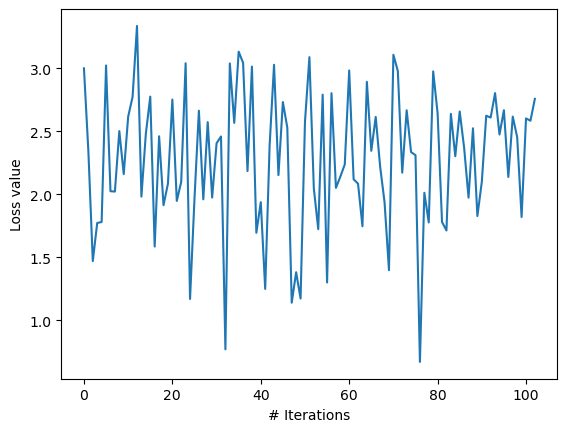

In [17]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel("# Iterations")
plt.ylabel("Loss value")
plt.show()

## Dry Run

In [15]:
embedding_dims = TokenProperties(
            eigval_trunc_dim,
            eigvec_trunc_dim,
            gt_1q_dim,
            gt_2q_dim,
            stab_sign_dim,
            pauli_dim
        )
token_A_embedding = Token_A_Embedding(embedding_dims)
token_B_embedding = Token_B_Embedding(embedding_dims)
token_C_embedding = Token_C_Embedding(embedding_dims)
token_D_embedding = Token_D_Embedding(embedding_dims)
token_E_embedding = Token_E_Embedding(embedding_dims)

n = 5
loss = nn.MSELoss()
optimizer = optim.Adam(token_C_embedding.parameters())

for i in range(2):
    n, layout, gate_set_1q, gate_set_2q, d, gate_list, observation, lsp_env = create_labelled_data(n, n+1, gen)

    graph_eigval, graph_eigvec = torch.linalg.eigh(layout.graph.float())
    target = torch.randn(embedding_dims.dA).unsqueeze(0)

    optimizer.zero_grad()

    ##### Computation #####
    graph_eigval, graph_eigvec = torch.linalg.eigh(layout.graph.float())
    # Token A -> Global token representing the graph
    global_tensor = token_A_embedding(graph_eigval)
    # Token B
    # Q: Is there no learned embedding for the qubits? It will be used in stabilizer and
    # tableau-cell tokens as well. There seems to be a very small amount of learnable
    # components then.
    qubit_tensors = token_B_embedding(graph_eigvec)
    nq = qubit_tensors.shape[-2]
    # Token C
    gate_tensors = token_C_embedding(gate_set_1q, gate_set_2q, qubit_tensors, layout)
    print(observation.shape)
    # Token D
    stabilizer_tensors = token_D_embedding(nq, observation)
    # Token E
    tableau_cell_tensors = token_E_embedding(qubit_tensors, observation)
    ######   #####

    target = torch.randn(*gate_tensors.shape[-2:])
    output = loss(target, gate_tensors)
    output.backward()
    optimizer.step()


torch.Size([55])
torch.Size([55])


In [16]:
import torch.optim as optim

# create your optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(sl_model.parameters())
optimizer.zero_grad()
correct_answer = [0 for _ in range(lsp_env.action_space(env_params).n)]
correct_answer[gate_list[-1]] = 1
output = loss(Token_A_Embedding, torch.tensor(correct_answer).float())
output.backward()
optimizer.step()

NameError: name 'env_params' is not defined